In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Step function for bipolar inputs (-1, 1)
def step_function(x):
    return np.where(x >= 0, 1, -1)


In [3]:
# Perceptron learning algorithm
class Perceptron:
    def __init__(self, input_size, lr=0.1, epochs=100):
        self.weights = np.zeros(input_size + 1)  # +1 for bias
        self.lr = lr
        self.epochs = epochs
        self.errors = []

    def predict(self, X):
        # Add bias term (X0 = 1)
        X = np.insert(X, 0, 1, axis=1)
        net_input = np.dot(X, self.weights)
        return step_function(net_input)

    def train(self, X, y):
        X = np.insert(X, 0, 1, axis=1)  # Add bias term
        for epoch in range(self.epochs):
            total_error = 0
            for xi, target in zip(X, y):
                output = step_function(np.dot(xi, self.weights))
                error = target - output
                total_error += abs(error)
                self.weights += self.lr * error * xi  # Update rule
            self.errors.append(total_error)

            # Stop if no error (converged)
            if total_error == 0:
                break


In [9]:
# Generate bipolar AND data
X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
y = np.array([-1, -1, -1, 1])
X

array([[-1, -1],
       [-1,  1],
       [ 1, -1],
       [ 1,  1]])

In [10]:
y

array([-1, -1, -1,  1])

In [5]:
# Initialize and train the perceptron
p = Perceptron(input_size=2)
p.train(X, y)


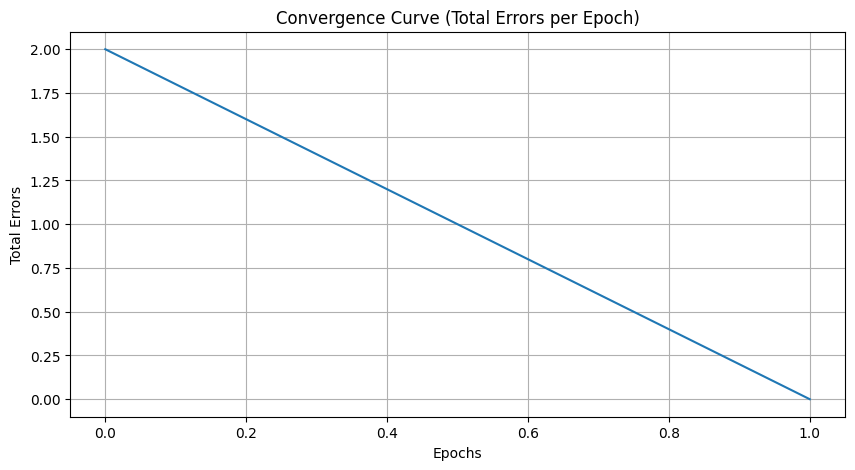

In [6]:
# Plot the convergence curve (errors over epochs)
plt.figure(figsize=(10, 5))
plt.plot(p.errors)
plt.title('Convergence Curve (Total Errors per Epoch)')
plt.xlabel('Epochs')
plt.ylabel('Total Errors')
plt.grid(True)
plt.show()


In [7]:
# Decision boundary plot
def plot_decision_boundary(X, y, model):
    # Set up grid range for plotting
    x_min, x_max = -2, 2
    y_min, y_max = -2, 2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    
    # Predict classes for each point in the grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid_points).reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    
    # Plot original points
    for idx, point in enumerate(X):
        if y[idx] == 1:
            plt.scatter(point[0], point[1], color='b', marker='o', label='Class 1' if idx == 0 else "")
        else:
            plt.scatter(point[0], point[1], color='r', marker='x', label='Class -1' if idx == 0 else "")
    
    plt.title('Decision Boundary for AND Function')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.grid(True)
    plt.show()


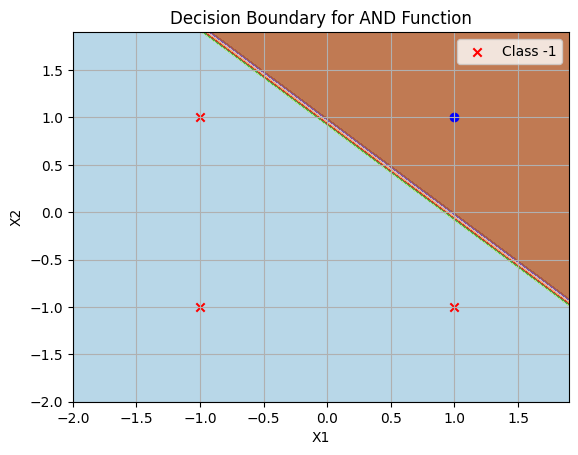

In [8]:
# Plot the decision boundary
plot_decision_boundary(X, y, p)


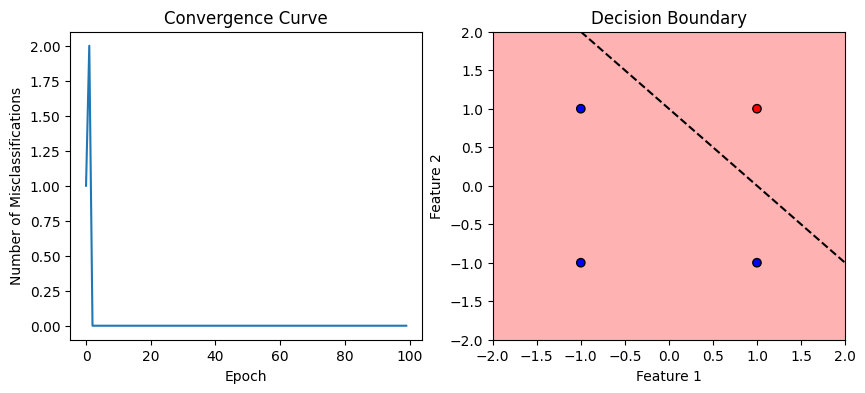

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Bipolar inputs and targets
X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
y = np.array([-1, -1, -1, 1])

# Perceptron parameters
learning_rate = 0.1
epochs = 100
n_samples, n_features = X.shape

# Initialize weights and bias
weights = np.zeros(n_features)
bias = 0

# For storing convergence curve
error_history = []

# Training the perceptron
for epoch in range(epochs):
    total_error = 0
    for i in range(n_samples):
        # Compute the linear combination
        linear_output = np.dot(X[i], weights) + bias
        # Apply the activation function (step function)
        predicted = 1 if linear_output > 0 else -1
        # Compute the error
        error = y[i] - predicted
        # Update weights and bias
        weights += learning_rate * error * X[i]
        bias += learning_rate * error
        total_error += int(error != 0)
    
    # Store the total error for this epoch
    error_history.append(total_error)

# Plot convergence curve
plt.figure(figsize=(10, 4))

# Convergence Curve
plt.subplot(1, 2, 1)
plt.plot(error_history)
plt.xlabel('Epoch')
plt.ylabel('Number of Misclassifications')
plt.title('Convergence Curve')

# Decision Boundary
plt.subplot(1, 2, 2)
x_min, x_max = -2, 2
y_min, y_max = -2, 2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], weights) + bias
Z = Z.reshape(xx.shape)

# Plot decision boundary regions
plt.contourf(xx, yy, Z, alpha=0.3, levels=[-1, 1], colors=['red', 'blue'])

# Plot decision boundary line
plt.contour(xx, yy, Z, levels=[0], colors='black', linestyles='--')

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.bwr)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')

plt.show()
